In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datascience import *
import random as rd

In [3]:
drug = Table.read_table("https://data.cdc.gov/api/views/xbxb-epbu/rows.csv?accessType=DOWNLOAD")
leading_death = Table.read_table("https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD")
# we use the read_table function from datascience moduel


Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Alabama,2313,52.2
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Alaska,294,55.9
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Arizona,2214,44.8
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Arkansas,1287,47.6
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,California,9198,28.7
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Colorado,1519,39
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Connecticut,1034,29.3
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Delaware,267,35.3
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,District of Columbia,161,28.4
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Florida,5961,35.7


In [4]:
pure = drug.select(["State","Year","Crude Death Rate", ])
pure

State,Year,Crude Death Rate
Alabama,1999,3.8148
Alabama,2000,4.4299
Alabama,2001,4.8348
Alabama,2002,4.7097
Alabama,2003,4.3744
Alabama,2004,6.2462
Alabama,2005,6.1928
Alabama,2006,8.598
Alabama,2007,10.9355
Alabama,2008,12.8651


In [5]:
death_rate_by_year = pure.group("Year", np.mean)
death_rate_by_year.select("Year", "Crude Death Rate mean")

Year,Crude Death Rate mean
1999,5.92677
2000,6.0188
2001,6.59315
2002,7.69686
2003,8.37448
2004,8.67609
2005,9.39699
2006,10.748
2007,10.901
2008,10.8844


In [6]:
#Question 1 
# We calculate the mean of the crude death rate mean for all states for each year from 2000-2015. As from the data shown above, we can see that the death rate is in the increaing trend along with the year.   

In [7]:
state_name = pure.where("Year", 2000).where('State', are.not_equal_to('United States')).select(['State'])
state_lst = state_name.column(0).tolist()
death_by_state_year= pure.pivot("State", "Year", values='Crude Death Rate', collect = np.mean)
death_by_state_year_sort= death_by_state_year.drop(45)
lst= []
for i in range(1, 52):
    avg = np.mean(death_by_state_year_sort.column(i))
    lst += [avg]
death_by_state_year

Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1999,3.8148,7.3626,10.1715,4.2612,7.9465,8.2584,9.1543,6.4517,8.4178,6.3264,3.5173,6.6099,5.017,6.6753,3.1597,1.8165,3.323,4.9029,4.2145,5.2889,11.9707,7.7248,4.6478,2.7906,3.0759,4.9623,4.5682,2.2877,11.733,4.4189,6.663,14.7117,5.0787,4.6041,1.8626,4.1198,5.1787,6.1875,8.0725,5.5748,3.6984,2.2654,6.1007,5.2874,5.99141,9.3035,4.7959,5.2284,9.4993,4.1395,3.9755,4.0669
2000,4.4299,7.6563,10.1742,5.2368,5.7305,8.1836,9.3964,7.0189,13.2853,7.2517,4.4464,5.2,4.9461,6.9891,3.5195,2.4946,3.8312,5.9627,5.5494,4.7846,11.7625,7.2924,5.6447,2.6426,4.0075,5.4153,4.5445,2.6881,13.6619,3.6414,7.6417,14.8979,4.0419,6.0999,2.18,4.959,6.8683,6.0794,9.3396,7.0589,6.4307,2.6496,6.978,4.8965,5.86663,9.4037,5.913,5.8063,9.4331,6.2488,4.6237,4.4554
2001,4.8348,9.7836,10.4675,4.6813,3.5557,9.2867,8.943,8.0432,16.1879,10.6744,6.1,6.2809,7.4245,7.1426,4.6183,2.9673,5.107,8.4806,5.918,6.6112,11.8891,10.7696,6.2155,3.7128,5.9236,6.2221,6.1745,3.8376,12.4381,6.2922,8.3013,14.0854,5.6543,6.7112,2.1907,6.4721,7.7586,6.9494,7.7893,10.4054,5.9533,3.1663,7.3729,6.4448,6.26448,9.1518,7.1869,6.3765,8.3365,11.435,4.9752,4.4475
2002,4.7097,13.0772,11.5636,6.5042,8.5312,9.9768,10.2349,10.4197,10.6428,11.5463,6.6171,6.2116,8.7289,7.8719,4.7596,3.1013,6.2649,10.416,8.116,10.7256,13.2895,10.9861,7.4982,4.0048,6.4016,7.3306,8.5558,3.8188,14.8588,8.7464,9.5058,15.4691,4.8229,7.7707,2.6639,8.161,6.8786,9.051,8.8963,9.2871,5.2826,2.8947,8.4715,7.3673,7.39265,12.3881,7.6368,6.9852,10.624,12.6841,6.2441,6.7998
2003,4.3744,12.8005,12.2315,6.7527,8.8162,11.0848,8.8109,9.4132,18.1178,12.0795,7.0395,7.3532,7.4814,6.7458,7.0038,3.2631,6.9041,13.6016,11.8557,10.1798,14.1733,12.8142,7.5788,4.8678,7.2168,9.1428,10.1128,3.1634,15.2078,9.9231,8.3824,19.0672,5.0271,9.0472,3.4439,6.7776,11.4126,10.0074,11.1599,13.6278,6.9152,3.1425,11.3205,7.957,7.89291,14.9568,10.5202,7.425,11.4021,14.4568,6.9901,5.9588
2004,6.2462,13.0444,13.1625,8.3646,8.7844,11.3224,9.5249,7.583,15.3235,13,7.5947,8.0875,7.0412,8.221,8.6956,4.1305,8.192,12.6866,11.8403,10.657,12.1869,10.4331,8.6223,4.9138,7.7535,9.5342,10.5375,3.3726,16.1963,9.6115,6.833,16.4933,4.3345,9.9846,2.6369,9.9194,13.5027,10.2256,12.4409,9.8643,8.4542,5.5815,12.9086,8.0959,8.17318,14.9069,8.0656,7.4643,13.1259,18.3326,7.9252,9.0354
2005,6.1928,11.845,13.598,9.6724,8.9707,13.1264,8.4119,7.336,13.577,13.2888,8.2681,9.7468,7.6318,8.4616,9.7155,4.7564,8.7786,15.2532,14.4429,12.3598,11.7302,12.1812,9.7999,5.5082,8.5342,10.5003,10.2117,4.8822,18.79,10.9358,9.5123,19.3037,4.934,11.4871,1.8573,10.8433,13.4701,10.683,12.9558,14.6079,9.9996,5.158,14.555,8.3852,8.94216,17.8214,8.5317,7.6678,13.5841,10.1072,9.3398,5.0568
2006,8.598,11.2542,14.5294,10.1001,9.6998,13.2827,11.5708,9.0775,17.6982,14.2621,9.0653,6.5662,8.8516,10.8273,11.6223,6.2696,9.3017,17.2543,16.3852,12.0125,13.541,15.1324,11.7177,6.023,11.6696,12.7167,10.1817,5.1334,18.2744,11.3881,9.7787,21.3033,8.7937,11.8758,2.1558,13.1955,15.6646,13.2121,13.0927,16.4614,12.7127,4.7252,16.0131,9.3794,10.2194,17.5806,12.0406,8.1968,14.08,19.804,10.6317,10.523
2007,10.9355,10.5836,15.2894,10.5664,10.6316,15.2794,12.2758,11.1271,10.6197,15.2114,9.8717,10.3369,8.3715,9.3889,12.2421,6.7684,9.699,16.6327,18.4661,11.9816,13.6024,14.3356,12.3584,6.5486,10.7228,12.1272,12.9573,4.4857,19.1844,14.171,8.3776,23.2153,8.9273,11.8885,4.9018,13.8429,18.3252,13.4859,13.7934,12.7682,12.2634,4.0423,15.9495,9.2061,10.2482,19.6709,10.5857,9.0311,14.888,21.6461,11.0858,11.7784
2008,12.8651,18.4739,13.184,12.5237,10.55

In [8]:
new_table = Table().with_columns("State name",state_lst, 
                    "mean death rate", lst)
new_table.sort("mean death rate",descending = True).take[0:10]
Top_10 = new_table.sort("mean death rate",descending = True).take[0:10].column(0)
Top_10

array(['West Virginia', 'New Mexico', 'Nevada', 'Kentucky', 'Utah',
       'Rhode Island', 'Pennsylvania', 'Oklahoma', 'Arizona', 'Tennessee'], 
      dtype='<U13')

In [9]:
pure_1 = leading_death.where('Cause Name', 'Homicide').select(['Year', 'State', 'Age-adjusted Death Rate'])
pure_1


Year,State,Age-adjusted Death Rate
1999,Alabama,9.9
1999,Alaska,8.1
1999,Arizona,9.2
1999,Arkansas,6.8
1999,California,6
1999,Colorado,4.5
1999,Connecticut,3.7
1999,Delaware,3
1999,District of Columbia,29.6
1999,Florida,6.3


In [10]:
death_by_state_year_1= pure_1.pivot("State", "Year", values='Age-adjusted Death Rate', collect = np.mean)
death_by_state_year_1

Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1999,9.9,8.1,9.2,6.8,6,4.5,3.7,3,29.6,6.3,7.5,3.1,2.4,8.1,6.3,1.8,5.1,5.1,10.7,2,10.2,2.1,7.7,2.8,10.9,7,3.8,3.5,8.7,1.8,3.6,9.2,5.1,8,nan,4,6.7,3.1,5.4,3.5,7.8,3.2,7.4,6.3,6,2.3,nan,5.9,3.2,5.5,3.8,nan
2000,10,5.6,7.9,7.6,5.9,3.4,2.9,2.9,28.9,6.1,7.8,2.9,1.9,7.9,6,2,5.3,5,13.2,nan,9.7,1.9,7.3,2.8,10.9,7.2,4,3.7,6.7,nan,3.9,8.8,5.2,8,nan,4.1,5.9,2.7,5.5,3.8,8,nan,8.2,6.2,5.9,2.3,nan,6.1,3.4,4.4,3.2,nan
2001,9.6,5.7,9.3,6.9,6.2,3.7,5.1,4.1,30.9,6.1,7.8,2.8,3.1,8.6,7.1,2.1,5.3,5.4,12,1.7,10.4,3.8,6.9,2.5,11.5,7.8,3.6,2.6,8.4,2.2,12.2,7.1,14.6,7.2,nan,4.7,6.1,2.9,5.7,3.5,8.6,nan,7.8,6.4,7.1,3.4,nan,6.9,3.2,3.7,3.9,nan
2002,9.3,5.9,9.3,7.3,6.9,4,3,4.7,36.3,6.3,7.6,3.1,2.4,8,6.2,2,4.8,4.8,13.3,nan,10.1,2.9,7,2.5,10.7,6.5,2.5,3,8,nan,4,8.7,4.8,7.6,nan,4.9,5.6,3.1,5.4,4,7.9,3,8,6.4,6.1,2.3,nan,5.4,3.5,5.5,3.5,4.6
2003,9.7,6.9,8.8,7.3,6.9,4.1,3.1,3.1,30.6,6.1,8.3,1.6,2.4,7.6,5.6,1.8,4.5,4.7,13.2,nan,10.3,2.2,6.6,2.5,10.7,5.8,4.2,3.6,8,1.6,5.1,8.8,5,7,nan,4.7,6.4,2.6,5.7,2.7,7.8,nan,7.5,6.8,6.1,2.5,nan,6.2,3.5,5,3.6,nan
2004,8.3,6.1,9,7.8,6.8,4.7,3.3,4.2,27.9,6.1,7.4,2.4,2.2,6.9,5.3,2,4.3,5.5,13,1.6,9.8,2.8,6.8,2.6,9.9,6.5,2.8,2.2,7.8,1.7,4.8,9.2,4.5,7.2,nan,5,6.3,3.1,5.8,2.7,7.8,3.2,7.1,6.2,5.9,1.9,nan,5.4,3.5,4.5,2.8,nan
2005,9.7,5.2,9,8,6.9,3.8,3.2,6.6,28.3,5.9,7.1,1.9,3.2,6.8,5.9,1.6,3.9,5.4,12.8,1.7,10.4,2.8,6.9,2.7,9,7.3,3.4,2.6,7.8,nan,5.1,7.9,4.7,7.6,nan,5.6,6.1,2.9,6.3,3.1,7.9,2.9,8.3,6.5,6.1,2.4,nan,6.4,3.6,5.4,4.3,nan
2006,9.7,6.2,9.1,8.5,7,3.7,3.9,6.1,23.2,6.9,7.3,2.1,2.6,6.8,6,2.5,4.2,4.7,12.7,1.5,10.2,2.9,7.4,2.5,11.1,7.2,3.8,3.1,8.7,1.6,5.4,7,5,7,nan,6,6.4,3.1,6.4,3.6,9,2.9,8,6.2,6.2,2.1,nan,5.3,3.5,5.5,3.5,nan
2007,10.5,7.2,8.5,8.8,6.3,3.5,3.1,5.7,23.8,7.5,8.1,1.8,3.2,6.8,5.9,1.8,4.2,5,14.4,2,10.3,3,7.3,2.3,9.9,6.6,2.5,4.1,7.2,nan,4.8,8.2,4.4,7.4,nan,5.7,6.9,2.2,6.3,2.2,8.6,nan,7.8,6.2,6.1,2.4,nan,5.3,3.1,4.9,3.6,nan
2008,9.8,4.4,7.6,7.7,6.1,3.9,3.8,7.6,25.6,7.4,7.4,2.1,1.6,6.8,5.2,2.8,4,5.7,12.2,2.7,9.3,2.6,6.6,2.5,11.3,8.4,4.2,4.3,6,1.6,4.5,7.8,4.6,7.2,nan,5.4,6.5,2.8,5.8,2.7,7.9,2.5,7.8,6,5.9,1.8,nan,4.8,3.4,4,2.8,nan


In [11]:
lst_1= []
for i in range(1, 52):
    avg_1 = np.mean(death_by_state_year_1.column(i))
    lst_1 += [avg_1]
lst_1
new_table_1 = Table().with_columns("State name",state_lst, 
                    "mean death rate", lst_1)
new_table_1.sort("mean death rate", descending = True).where("mean death rate", are.not_equal_to('nan')).take[7:17]
top_10_1 = new_table_1.sort("mean death rate", descending = True).take[7:17].column(0)
top_10_1

array(['District of Columbia', 'Louisiana', 'Mississippi', 'Alabama',
       'Maryland', 'South Carolina', 'New Mexico', 'Arkansas', 'Arizona',
       'Tennessee'], 
      dtype='<U20')

In [12]:
compare = Table().with_columns('drug poisoning death rate',Top_10, "homicide death rate", top_10_1 )
compare 


drug poisoning death rate,homicide death rate
West Virginia,District of Columbia
New Mexico,Louisiana
Nevada,Mississippi
Kentucky,Alabama
Utah,Maryland
Rhode Island,South Carolina
Pennsylvania,New Mexico
Oklahoma,Arkansas
Arizona,Arizona
Tennessee,Tennessee


In [13]:
#2. Which 10 states have the highest drug poisoning mortality rate and homicide mortality rate over the years (1999-2016), 
#and how is the ranking from each dataset similar or different from each other? 
#Comparing the top 10 rankings from two datasets with each other, we can see that there is not a lot of similarities 
#or correlations between them -- only 2 out of the 10 states in our ranking are in similar positions, 
#the rest of the states appear in either the ranking for drug poisoning or the ranking for homicide death rate but not for both
#Therefore, the differences between the two rankings outweight the similarities.

In [134]:
data1 = death_rate_by_year.select("Year", "Crude Death Rate mean")
data1





Year,Crude Death Rate mean
1999,5.92677
2000,6.0188
2001,6.59315
2002,7.69686
2003,8.37448
2004,8.67609
2005,9.39699
2006,10.748
2007,10.901
2008,10.8844


In [15]:
data2= pure_1.where(2, are.above(0)).group('Year', np.mean)
data2.select("Year", "Age-adjusted Death Rate mean")

Year,Age-adjusted Death Rate mean
1999,6.07551
2000,6.15217
2001,6.62917
2002,6.30625
2003,6.14468
2004,5.80816
2005,6.10208
2006,6.02653
2007,6.11489
2008,5.82449


In [19]:
comparedata = data1.join("Year", data2,"Year").drop(2)
comparedata= comparedata.relabeled(["Year", "Crude Death Rate mean","Age-adjusted Death Rate mean"],["Year","Drug posioning death", "Homocide rate"])

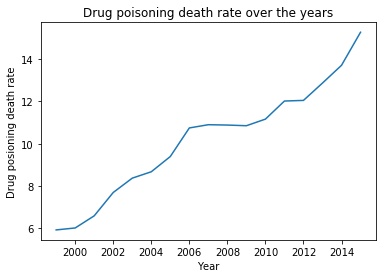

In [45]:
plt.plot(comparedata.column(0),comparedata.column(1))
plt.ylabel('Drug posioning death rate')
plt.xlabel('Year')
plt.title('Drug poisoning death rate over the years')
plt.show()

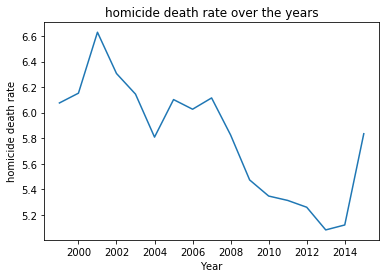

In [47]:
plt.plot(comparedata.column(0),comparedata.column(2))
plt.ylabel('homicide death rate')
plt.xlabel('Year')
plt.title('homicide death rate over the years')
plt.show()

In [157]:
rd.seed(1)
random_lst = rd.sample(state_lst,10)
random_lst

['District of Columbia',
 'Oklahoma',
 'West Virginia',
 'California',
 'Kansas',
 'Delaware',
 'New Mexico',
 'Nevada',
 'New Jersey',
 'South Dakota']

In [183]:
c= Table().with_columns(pure.where(0, 'District of Columbia').select(1,2))
d= Table().with_columns(pure.where(0, 'Oklahoma').select(1,2))
e= Table().with_columns(pure.where(0, 'West Virginia').select(1,2))
f= Table().with_columns(pure.where(0, 'California').select(1,2))
g= Table().with_columns(pure.where(0, 'Kansas').select(1,2))
h= Table().with_columns(pure.where(0, 'Delaware').select(1,2))
i= Table().with_columns(pure.where(0, 'New Mexico').select(1,2))
j= Table().with_columns(pure.where(0, 'Nevada').select(1,2))
k= Table().with_columns(pure.where(0, 'New Jersey').select(1,2))
l=Table().with_columns(pure.where(0, 'South Dakota').select(1,2))


In [159]:
ten_state = c.join("Year", d,"Year").join("Year", e,"Year").join("Year", f,"Year").join("Year", g,"Year").join("Year", h,"Year").join("Year", i,"Year").join("Year", j,"Year").join("Year", k,"Year").join("Year", l,"Year")


In [177]:
for_mean = ten_state.drop(0)
lst2= []
for i in range(len(ten_state.column(0))):
    each_mean = np.mean(list(for_mean.row(i)))
    lst2 += [each_mean]
lst2

[7.083029999999999,
 8.1834100000000003,
 9.0078500000000012,
 9.8149699999999989,
 11.492059999999999,
 11.682230000000001,
 11.500360000000001,
 13.53274,
 13.68683,
 14.248309999999998,
 12.497999999999999,
 15.618930000000001,
 17.242079999999998,
 16.371209999999998,
 17.303720000000002,
 17.86026,
 18.98208,
 23.833620000000003]

In [238]:
random_10_1 = Table().with_column("Year", ten_state.column(0), "Drug posioning death rate average", lst2)

In [199]:
c2= Table().with_columns(pure_1.where(1, 'District of Columbia').select(0,2))
d2= Table().with_columns(pure_1.where(1, 'Oklahoma').select(0,2))
e2= Table().with_columns(pure_1.where(1, 'West Virginia').select(0,2))
f2= Table().with_columns(pure_1.where(1, 'California').select(0,2))
g2= Table().with_columns(pure_1.where(1, 'Kansas').select(0,2))
h2= Table().with_columns(pure_1.where(1, 'Delaware').select(0,2))
i2= Table().with_columns(pure_1.where(1, 'New Mexico').select(0,2))
j2= Table().with_columns(pure_1.where(1, 'Nevada').select(0,2))
k2= Table().with_columns(pure_1.where(1, 'New Jersey').select(0,2))
l2=Table().with_columns(pure_1.where(1, 'South Dakota').select(0,2))


Year,Age-adjusted Death Rate
1999,6.7
2000,5.9
2001,6.1
2002,5.6
2003,6.4
2004,6.3
2005,6.1
2006,6.4
2007,6.9
2008,6.5


In [200]:
ten_state2 = c2.join("Year", d2,"Year").join("Year", e2,"Year").join("Year", f2,"Year").join("Year", g2,"Year").join("Year", h2,"Year").join("Year", i2,"Year").join("Year", j2,"Year").join("Year", k2,"Year").join("Year", l2,"Year")
ten_state2.show()


Year,Age-adjusted Death Rate,Age-adjusted Death Rate_2,Age-adjusted Death Rate_3,Age-adjusted Death Rate_4,Age-adjusted Death Rate_5,Age-adjusted Death Rate_6,Age-adjusted Death Rate_7,Age-adjusted Death Rate_8,Age-adjusted Death Rate_9,Age-adjusted Death Rate_10
1999,29.6,6.7,5.5,6,5.1,3,9.2,8.7,3.6,3.2
2000,28.9,5.9,4.4,5.9,5.3,2.9,8.8,6.7,3.9,nan
2001,30.9,6.1,3.7,6.2,5.3,4.1,7.1,8.4,12.2,nan
2002,36.3,5.6,5.5,6.9,4.8,4.7,8.7,8,4,3
2003,30.6,6.4,5,6.9,4.5,3.1,8.8,8,5.1,nan
2004,27.9,6.3,4.5,6.8,4.3,4.2,9.2,7.8,4.8,3.2
2005,28.3,6.1,5.4,6.9,3.9,6.6,7.9,7.8,5.1,2.9
2006,23.2,6.4,5.5,7,4.2,6.1,7,8.7,5.4,2.9
2007,23.8,6.9,4.9,6.3,4.2,5.7,8.2,7.2,4.8,nan
2008,25.6,6.5,4,6.1,4,7.6,7.8,6,4.5,2.5


In [211]:
nan_lst = list(ten_state2.column(10))
modified_lst = [i if i>0 else 0 for i in nan_lst]

[3.2000000000000002,
 0,
 0,
 3.0,
 0,
 3.2000000000000002,
 2.8999999999999999,
 2.8999999999999999,
 0,
 2.5,
 4.0,
 0,
 3.1000000000000001,
 2.3999999999999999,
 2.5,
 3.1000000000000001,
 4.2000000000000002]

In [213]:
modified_table = ten_state2.drop(10).with_columns('Age-adjusted Death Rate_10', modified_lst)
modified_table 

Year,Age-adjusted Death Rate,Age-adjusted Death Rate_2,Age-adjusted Death Rate_3,Age-adjusted Death Rate_4,Age-adjusted Death Rate_5,Age-adjusted Death Rate_6,Age-adjusted Death Rate_7,Age-adjusted Death Rate_8,Age-adjusted Death Rate_9,Age-adjusted Death Rate_10
1999,29.6,6.7,5.5,6,5.1,3,9.2,8.7,3.6,3.2
2000,28.9,5.9,4.4,5.9,5.3,2.9,8.8,6.7,3.9,0
2001,30.9,6.1,3.7,6.2,5.3,4.1,7.1,8.4,12.2,0
2002,36.3,5.6,5.5,6.9,4.8,4.7,8.7,8,4,3
2003,30.6,6.4,5,6.9,4.5,3.1,8.8,8,5.1,0
2004,27.9,6.3,4.5,6.8,4.3,4.2,9.2,7.8,4.8,3.2
2005,28.3,6.1,5.4,6.9,3.9,6.6,7.9,7.8,5.1,2.9
2006,23.2,6.4,5.5,7,4.2,6.1,7,8.7,5.4,2.9
2007,23.8,6.9,4.9,6.3,4.2,5.7,8.2,7.2,4.8,0
2008,25.6,6.5,4,6.1,4,7.6,7.8,6,4.5,2.5


In [214]:
for_mean2 = modified_table.drop(0)
lst3= []
for i in range(len(modified_table.column(0))):
    each_mean = np.mean(list(for_mean2.row(i)))
    lst3 += [each_mean]
lst3

[8.0600000000000005,
 7.2700000000000005,
 8.4000000000000004,
 8.75,
 7.839999999999999,
 7.9000000000000004,
 8.0899999999999999,
 7.6400000000000006,
 7.2000000000000002,
 7.4599999999999991,
 6.9600000000000009,
 6.2200000000000006,
 6.3300000000000001,
 5.8599999999999994,
 5.7700000000000005,
 6.1599999999999993,
 7.1100000000000012]

In [220]:
random_10_2= Table().with_column("Year", modified_table.column(0), "Homocide death rate average", lst3)

In [239]:
random_10_1.take[0:17]

Year,Drug posioning death rate average
1999,7.08303
2000,8.18341
2001,9.00785
2002,9.81497
2003,11.4921
2004,11.6822
2005,11.5004
2006,13.5327
2007,13.6868
2008,14.2483


In [222]:
random_10_2

Year,Homocide death rate average
1999,8.06
2000,7.27
2001,8.4
2002,8.75
2003,7.84
2004,7.9
2005,8.09
2006,7.64
2007,7.2
2008,7.46


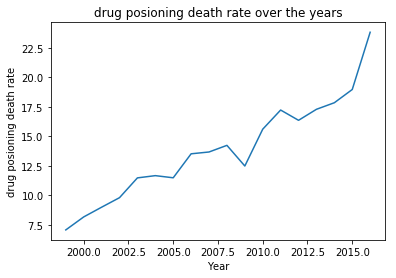

In [224]:
plt.plot(random_10_1.column(0),random_10_1.column(1))
plt.ylabel('drug posioning death rate')
plt.xlabel('Year')
plt.title('drug posioning death rate over the years')
plt.show()

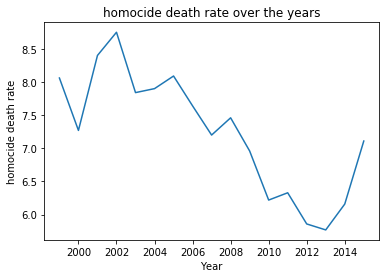

In [225]:
plt.plot(random_10_2.column(0),random_10_2.column(1))
plt.ylabel('homocide death rate')
plt.xlabel('Year')
plt.title('homocide death rate over the years')
plt.show()

In [228]:
np.corrcoef(comparedata.column(1),comparedata.column(2))

array([[ 1.        , -0.71805376],
       [-0.71805376,  1.        ]])

In [240]:
np.corrcoef(random_10_1.take[0:17].column(1),random_10_2.column(1))

array([[ 1.        , -0.77467851],
       [-0.77467851,  1.        ]])

In [ ]:
#In this problem, we compare the trend between the 50 states over the year 1999-2015 as population, and the program
# to random generate 10 states as samples. We view the 10 states as a single bootsrapts from the population. From both 
#the population and sample trend of drug poisoning death rate over the year , we can see that the trend is constantly going up, and 
# the homocide death rate trend over the year is going down with slight fluctuation in between. We calculate the correlation coefficient
# between the two variables and they both shows negative correlation which shows that as the drug poisoning death rate over the years 
#increases, the homicide death rate decreases. Since correlation does not mean causation, we could not further investigate 
#from the trends. We made our hypothesis that the reason that homicide rates do not increase with the drug poisoning is that 
#the method of drug poisoning requires the very accurate amount and drugs that actually causes overdose to death. Many people who made
#suicide attempt however, could not successfully suicides from the drug. Also, women is more likely to suicide by using 
#drug and men is more likely to suicide by guns. As the laws have less limitation on controlling the guns usage, it's easier 
#for anyone in US to have access to guns. Therefore, we predict that drug poisoning does have high suicide attempt rate but
#not high suicide death rates.